## Import Libraries and Load Data

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Load dataset
data = pd.read_csv('/content/UsedCars.csv')

print("----------- View the First Five Rows of the Data --------------")
print(data.head())

print("------------- Data Information Check of Size and Completeness --------------")
print(data.info())


----------- View the First Five Rows of the Data --------------
   Year       Make         Model  Price  Number of Owners           Use  \
0  2011  Chevrolet  Silverado LT   9988                 2  Personal Use   
1  2008     Toyota    Corolla CE   7995                 2  Multiple Use   
2  2012        Kia        Rio LX   4995                 2  Personal Use   
3  2018     Nissan      Rogue SL   7980                 1  Personal Use   
4  2018    Hyundai    Tucson SEL   9775                 1  Personal Use   

     Body  Mileage Damage Accident Purchase  
0  Pickup   125210    Yes       No       No  
1   Sedan   121681     No       No      Yes  
2   Sedan   140401     No       No       No  
3     SUV   213787     No       No       No  
4     SUV   147815     No       No       No  
------------- Data Information Check of Size and Completeness --------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 11 columns):
 #   Column            Non-Nu

In [22]:
# Specify columns with "Yes" and "No" values to map to binary
binary_cols = ['Purchase', 'Damage']  # Add any other "Yes"/"No" columns here
binary_cols[1]

'Damage'

## Transform Data and Divide Data into Training and Testing Sets

In [23]:
# Subset or filter to specific columns of interest
data = data[['Year', 'Make', 'Price', 'Number of Owners', 'Use', 'Body', 'Mileage', 'Damage', 'Purchase']]

# Specify columns with "Yes" and "No" values to map to binary
binary_cols = ['Purchase', 'Damage']  # Add any other "Yes"/"No" columns here

# Map binary columns to 0 and 1
for col in binary_cols:
    data[col] = data[col].map({'No': 0, 'Yes': 1})

# Separate features and target
X = data.drop(['Purchase'], axis=1)
y = data['Purchase']

# Define categorical columns to one-hot encode (excluding binary-encoded columns)
categorical_cols = ['Make', 'Use', 'Body']
numeric_cols = ['Year', 'Price', 'Number of Owners', 'Mileage']

# One-hot encode the categorical columns
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[categorical_cols])

# # Convert the encoded data to a DataFrame with feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoded_feature_names, index=X.index)

# # Concatenate the encoded categorical data with the numeric and binary columns
X_final = pd.concat([X[numeric_cols + [binary_cols[1]]], X_encoded_df], axis=1)

print("-------------Input Data After Transformations ------------")
print(X_final.head())
# # Continue with splitting the data, training, and evaluating the model as before
# X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)


-------------Input Data After Transformations ------------
   Year  Price  Number of Owners  Mileage  Damage  Make_Audi  Make_BMW  \
0  2011   9988                 2   125210     1.0        0.0       0.0   
1  2008   7995                 2   121681     0.0        0.0       0.0   
2  2012   4995                 2   140401     0.0        0.0       0.0   
3  2018   7980                 1   213787     0.0        0.0       0.0   
4  2018   9775                 1   147815     0.0        0.0       0.0   

   Make_BMW   Make_Buick  Make_Cadillac  ...  Use_Personal Use  \
0        0.0         0.0            0.0  ...               1.0   
1        0.0         0.0            0.0  ...               0.0   
2        0.0         0.0            0.0  ...               1.0   
3        0.0         0.0            0.0  ...               1.0   
4        0.0         0.0            0.0  ...               1.0   

   Use_Rental Use  Body_Coupe  Body_Hatchback  Body_Minivan  Body_Pickup  \
0             0.0      

<ipython-input-23-73d71fc6a148>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].map({'No': 0, 'Yes': 1})
<ipython-input-23-73d71fc6a148>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].map({'No': 0, 'Yes': 1})


In [2]:
X_encoded_df.head()

,Make_Audi,Make_BMW,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chevrolet,Make_Dodge,Make_Ford,Make_GMC,...,Body_SUV,Body_Sedan,Body_Wagon,Body_hatchback,Accident_No,Accident_No,Accident_Yes,Damage_No,Damage_No,Damage_Yes
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Train Decision Trees with Varying Max Depth

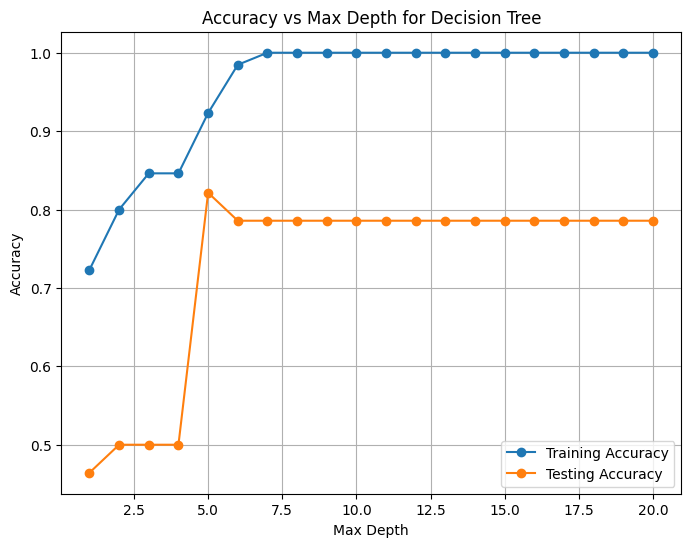

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Store accuracies
train_accuracies = []
test_accuracies = []

# Convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
# Vary max_depth from 1 to 20
depths = range(1, 21)
for depth in depths:
    # Create a DecisionTreeClassifier with varying max_depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Fit the model
    clf.fit(X_train, y_train)

    # Predict on both train and test sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Compute accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Plotting accuracies
plt.figure(figsize=(8, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='o')

# Adding labels and title
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import graphviz
import matplotlib.pyplot as plt

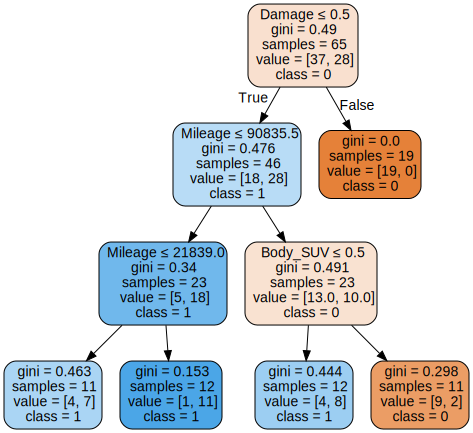

In [26]:
# Initialize and fit the model with the best max_depth
clf_best = DecisionTreeClassifier(max_depth=5,min_samples_split=6,
        min_samples_leaf=10,random_state=42)
clf_best.fit(X_train, y_train)

# Export as DOT file for visualization
dot_data = export_graphviz(
    clf_best, out_file=None,
    feature_names=X_train.columns,
    class_names=[str(class_) for class_ in clf_best.classes_],
    filled=True, rounded=True,
    special_characters=True
)

# Use Graphviz to display the tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save the plot as a file if needed
graph  # Display the plot


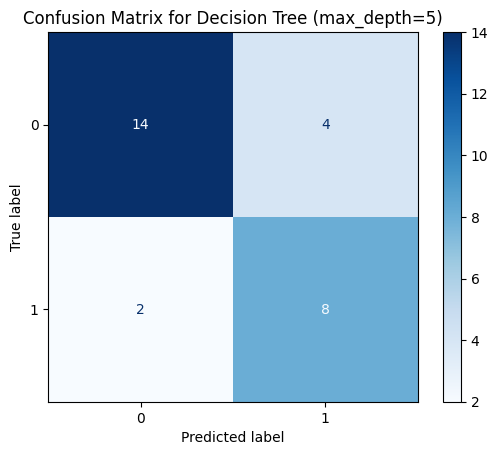

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

# Predict on the test set
y_test_pred = clf_best.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_best.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree (max_depth=5)")
plt.show()


In [28]:
from sklearn.metrics import accuracy_score

# Calculate training and test accuracy
y_train_pred = clf_best.predict(X_train)
y_test_pred = clf_best.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.83
Test Accuracy: 0.79


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('/content/UsedCars.csv')
X = data.drop(['Purchase', 'Model'], axis=1)
y = data['Purchase']

# Define categorical and numeric columns
categorical_cols = ['Make', 'Use', 'Body', 'Accident', 'Damage']
numeric_cols = ['Year', 'Price', 'Number of Owners', 'Mileage']

# One-hot encode the categorical columns
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[categorical_cols])

# Convert the encoded data to a DataFrame with feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoded_feature_names, index=X.index)

# Concatenate the encoded categorical data with the numeric data
X_final = pd.concat([X[numeric_cols], X_encoded_df], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Define parameter ranges
depths = range(1, 21)
min_samples_splits = [2, 5, 10]
min_samples_leaves = [1, 5, 10]

# Store results
best_score = 0
best_params = {}

for depth in depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            # Create the Decision Tree with current parameters
            clf = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )

            # Perform cross-validation
            cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
            mean_cv_score = np.mean(cv_scores)

            # Update the best score and parameters if current combination is better
            if mean_cv_score > best_score:
                best_score = mean_cv_score
                best_params = {
                    'max_depth': depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }

# Train final model with best parameters on the entire training set
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

# Evaluate on training and testing sets
train_accuracy = accuracy_score(y_train, best_clf.predict(X_train))
test_accuracy = accuracy_score(y_test, best_clf.predict(X_test))

# Print the best parameters and accuracies
print("Best Parameters:")
print(f"Max Depth: {best_params['max_depth']}")
print(f"Min Samples Split: {best_params['min_samples_split']}")
print(f"Min Samples Leaf: {best_params['min_samples_leaf']}")
print(f"Cross-Validated Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Best Parameters:
Max Depth: 8
Min Samples Split: 10
Min Samples Leaf: 1
Cross-Validated Training Accuracy: 0.9846153846153847
Testing Accuracy: 0.7857142857142857
